# Problem Statement  

	Kenaikan kasus positif Covid-19 yang disebabkan oleh PPLN maupun NON-PPLN di Indonesia, terutama Jakarta.

# Problem 

	Kenaikan kasus positif Covid-19 meningkatkan resiko datangnya varian dan gelombang baru yang dapat menghambat bahkan menghancurkan proses Covid-19 recovery di Indonesia.

# Background

	Kasus Covid-19 mengalami peningkatan terutama setelah ppkm diperlonggar beberapa bulan lalu. Menurut laman SINDOnews, kasus positif Covid-19 di Indonesia bertambah sebanyak 2.472 kasus pada hari Jumat, 8 Juli 2022. Kenaikan ini diiringi dengan munculnya banyak sub varian baru seperti Omicron BA.4 dan Omicron BA.5 yang memiliki potensi dapat memicu gelombang baru.

# Details

	PPKM dilakukan untuk menekan angka kenaikan kasus positif Covid-19 dengan cara mengontrol kegiatan masyarakat. Dengan dilonggarkannya PPKM, kegiatan masyarakat menjadi semakin bebas. Kini kita dapat melihat semakin banyak masyarakat yang tidak menerapkan protokol kesehatan. Bahkan pemeriksaan suhu, pemeriksaan sertifikat vaksin, dan scan QR Code aplikasi PeduliLindungi sudah banyak diabaikan di berbagai area publik seperti mall, bioskop dan lain-lain.

# Impact

    Meningkatkan resiko terhambatnya Covid-19 recovery di Indonesia.  Jika kasus positif Covid-19 terus meningkat, maka akan meningkatkan resiko munculnya gelombang varian baru yang dapat melumpuhkan kembali keadaan Indonesia,  terutama keadaan ekonomi, pendidikan, dan kesehatan. Dan masih banyak orang yang gagap teknologi serta tidak memiliki akses ke teknologi yang diperlukan untuk melaksanakan kegiatan seperti work from home, zoom meeting dsb. Sehingga aspek ekonomi dan pendidikan akan sangat terdampak.


### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning and Preprocessing

### Baca File dan Menampilkan 5 data Teratas

#### Melihat dan check data 

In [4]:
df=pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx',sheet_name='Kasus PPLN dan Omicron')
df.head()

,Tanggal,Kasus Harian,Kasus Positif Harian,Kasus Positif Harian.1,Kasus Positif Harian.2,Kasus Positif Harian.3,Kasus Positif Aktif,Kasus Positif Aktif.1,Kasus Positif Aktif.2,Kasus Positif Aktif.3,Kasus Positif Aktif.4,Kasus Omicron Total,Kasus Omicron Total.1,Kasus Omicron Total.2,Kasus Omicron Total.3,Kasus Omicron Total.4
0,NaT,Total,PPLN,Non-PPLN,% PPLN,% Non PPLN,Total,PPLN,Non-PPLN,% PPLN,% Non PPLN,Total,PPLN,Non-PPLN,% PPLN,% Non PPLN
1,2022-01-06,267.0,220.0,47,0.82397,0.17603,1181.0,908.0,273,0.76884,0.23116,251.0,239.0,12,0.952191,0.047809
2,2022-01-07,300.0,230.0,70,0.766667,0.233333,1404.0,1082.0,322,0.770655,0.229345,311.0,271.0,40,0.871383,0.128617
3,2022-01-08,278.0,180.0,98,0.647482,0.352518,1603.0,1212.0,391,0.756082,0.243918,333.0,280.0,53,0.840841,0.159159
4,2022-01-09,393.0,294.0,99,0.748092,0.251908,1885.0,1415.0,470,0.750663,0.249337,407,350.0,57,0.859951,0.140049


### Menampilkan bentuk dari dataframe

In [5]:
df.shape

(584, 16)

### Menampilkan tipe dari variable yang ada dalam dataframe

#### Disini terlihat tipe data berupa object, oleh karena itu harus diconvert terlebih dahulu menjadi float atau integer agar bisa ditemukan korelasinya.

In [6]:
df.dtypes

Tanggal                   datetime64[ns]
Kasus Harian                      object
Kasus Positif Harian              object
Kasus Positif Harian.1            object
Kasus Positif Harian.2            object
Kasus Positif Harian.3            object
Kasus Positif Aktif               object
Kasus Positif Aktif.1             object
Kasus Positif Aktif.2             object
Kasus Positif Aktif.3             object
Kasus Positif Aktif.4             object
Kasus Omicron Total               object
Kasus Omicron Total.1             object
Kasus Omicron Total.2             object
Kasus Omicron Total.3             object
Kasus Omicron Total.4             object
dtype: object

### Check jumlah data yang hilang

In [7]:
df.isnull().sum()

Tanggal                   402
Kasus Harian              390
Kasus Positif Harian      390
Kasus Positif Harian.1    387
Kasus Positif Harian.2    387
Kasus Positif Harian.3    387
Kasus Positif Aktif       390
Kasus Positif Aktif.1     390
Kasus Positif Aktif.2     387
Kasus Positif Aktif.3     387
Kasus Positif Aktif.4     387
Kasus Omicron Total       389
Kasus Omicron Total.1     389
Kasus Omicron Total.2     387
Kasus Omicron Total.3     387
Kasus Omicron Total.4     387
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Tanggal                 182 non-null    datetime64[ns]
 1   Kasus Harian            194 non-null    object        
 2   Kasus Positif Harian    194 non-null    object        
 3   Kasus Positif Harian.1  197 non-null    object        
 4   Kasus Positif Harian.2  197 non-null    object        
 5   Kasus Positif Harian.3  197 non-null    object        
 6   Kasus Positif Aktif     194 non-null    object        
 7   Kasus Positif Aktif.1   194 non-null    object        
 8   Kasus Positif Aktif.2   197 non-null    object        
 9   Kasus Positif Aktif.3   197 non-null    object        
 10  Kasus Positif Aktif.4   197 non-null    object        
 11  Kasus Omicron Total     195 non-null    object        
 12  Kasus Omicron Total.1   195 non-null    object    

### Menghapus data yang tidak diperlukan

In [9]:
data_updated=df.drop(df.index[0])
pd. set_option('display.max_rows', None)
data_updated

,Tanggal,Kasus Harian,Kasus Positif Harian,Kasus Positif Harian.1,Kasus Positif Harian.2,Kasus Positif Harian.3,Kasus Positif Aktif,Kasus Positif Aktif.1,Kasus Positif Aktif.2,Kasus Positif Aktif.3,Kasus Positif Aktif.4,Kasus Omicron Total,Kasus Omicron Total.1,Kasus Omicron Total.2,Kasus Omicron Total.3,Kasus Omicron Total.4
1,2022-01-06,267.0,220.0,47,0.82397,0.17603,1181.0,908.0,273,0.76884,0.23116,251.0,239.0,12,0.952191,0.047809
2,2022-01-07,300.0,230.0,70,0.766667,0.233333,1404.0,1082.0,322,0.770655,0.229345,311.0,271.0,40,0.871383,0.128617
3,2022-01-08,278.0,180.0,98,0.647482,0.352518,1603.0,1212.0,391,0.756082,0.243918,333.0,280.0,53,0.840841,0.159159
4,2022-01-09,393.0,294.0,99,0.748092,0.251908,1885.0,1415.0,470,0.750663,0.249337,407,350.0,57,0.859951,0.140049
5,2022-01-10,360.0,259.0,101,0.719444,0.280556,2140.0,1603.0,537,0.749065,0.250935,407,350.0,57,0.859951,0.140049
6,2022-01-11,537.0,435.0,102,0.810056,0.189944,2494.0,1910.0,584,0.765838,0.234162,498.0,409.0,89,0.821285,0.178715
7,2022-01-12,412.0,248.0,164,0.601942,0.398058,2763.0,2044.0,719,0.739776,0.260224,498.0,409.0,89,0.821285,0.178715
8,2022-01-13,478.0,303.0,175,0.633891,0.366109,2947.0,2119.0,828,0.719036,0.280964,565.0,458.0,107,0.810619,0.189381
9,2022-01-14,554.0,261.0,293,0.471119,0.528881,3336.0,2264.0,1072,0.678657,0.321343,725.0,545.0,180,0.751724,0.248276
10,2022-01-15,720.0,375.0,345,0.520833,0.479167,3779.0,2433.0,1346,0.643821,0.356179,720.0,567.0,153,0.7875,0.2125


In [10]:
data_updated=data_updated.drop(data_updated.index[182:])
data_updated

,Tanggal,Kasus Harian,Kasus Positif Harian,Kasus Positif Harian.1,Kasus Positif Harian.2,Kasus Positif Harian.3,Kasus Positif Aktif,Kasus Positif Aktif.1,Kasus Positif Aktif.2,Kasus Positif Aktif.3,Kasus Positif Aktif.4,Kasus Omicron Total,Kasus Omicron Total.1,Kasus Omicron Total.2,Kasus Omicron Total.3,Kasus Omicron Total.4
1,2022-01-06,267.0,220.0,47,0.82397,0.17603,1181.0,908.0,273,0.76884,0.23116,251.0,239.0,12,0.952191,0.047809
2,2022-01-07,300.0,230.0,70,0.766667,0.233333,1404.0,1082.0,322,0.770655,0.229345,311.0,271.0,40,0.871383,0.128617
3,2022-01-08,278.0,180.0,98,0.647482,0.352518,1603.0,1212.0,391,0.756082,0.243918,333.0,280.0,53,0.840841,0.159159
4,2022-01-09,393.0,294.0,99,0.748092,0.251908,1885.0,1415.0,470,0.750663,0.249337,407,350.0,57,0.859951,0.140049
5,2022-01-10,360.0,259.0,101,0.719444,0.280556,2140.0,1603.0,537,0.749065,0.250935,407,350.0,57,0.859951,0.140049
6,2022-01-11,537.0,435.0,102,0.810056,0.189944,2494.0,1910.0,584,0.765838,0.234162,498.0,409.0,89,0.821285,0.178715
7,2022-01-12,412.0,248.0,164,0.601942,0.398058,2763.0,2044.0,719,0.739776,0.260224,498.0,409.0,89,0.821285,0.178715
8,2022-01-13,478.0,303.0,175,0.633891,0.366109,2947.0,2119.0,828,0.719036,0.280964,565.0,458.0,107,0.810619,0.189381
9,2022-01-14,554.0,261.0,293,0.471119,0.528881,3336.0,2264.0,1072,0.678657,0.321343,725.0,545.0,180,0.751724,0.248276
10,2022-01-15,720.0,375.0,345,0.520833,0.479167,3779.0,2433.0,1346,0.643821,0.356179,720.0,567.0,153,0.7875,0.2125


### Check tipe dan info dari DataFrame data_updated

In [11]:
data_updated.dtypes

Tanggal                   datetime64[ns]
Kasus Harian                      object
Kasus Positif Harian              object
Kasus Positif Harian.1            object
Kasus Positif Harian.2            object
Kasus Positif Harian.3            object
Kasus Positif Aktif               object
Kasus Positif Aktif.1             object
Kasus Positif Aktif.2             object
Kasus Positif Aktif.3             object
Kasus Positif Aktif.4             object
Kasus Omicron Total               object
Kasus Omicron Total.1             object
Kasus Omicron Total.2             object
Kasus Omicron Total.3             object
Kasus Omicron Total.4             object
dtype: object

In [12]:
data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 1 to 182
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Tanggal                 182 non-null    datetime64[ns]
 1   Kasus Harian            182 non-null    object        
 2   Kasus Positif Harian    182 non-null    object        
 3   Kasus Positif Harian.1  182 non-null    object        
 4   Kasus Positif Harian.2  182 non-null    object        
 5   Kasus Positif Harian.3  182 non-null    object        
 6   Kasus Positif Aktif     182 non-null    object        
 7   Kasus Positif Aktif.1   182 non-null    object        
 8   Kasus Positif Aktif.2   182 non-null    object        
 9   Kasus Positif Aktif.3   182 non-null    object        
 10  Kasus Positif Aktif.4   182 non-null    object        
 11  Kasus Omicron Total     182 non-null    object        
 12  Kasus Omicron Total.1   182 non-null    object    

### Check nama-nama kolom dataframe data_updated

In [13]:
data_updated.columns

Index(['Tanggal', 'Kasus Harian', 'Kasus Positif Harian',
       'Kasus Positif Harian.1', 'Kasus Positif Harian.2',
       'Kasus Positif Harian.3', 'Kasus Positif Aktif',
       'Kasus Positif Aktif.1', 'Kasus Positif Aktif.2',
       'Kasus Positif Aktif.3', 'Kasus Positif Aktif.4', 'Kasus Omicron Total',
       'Kasus Omicron Total.1', 'Kasus Omicron Total.2',
       'Kasus Omicron Total.3', 'Kasus Omicron Total.4'],
      dtype='object')

### Mengganti variable bertipe objek menjadi float

In [14]:
data_updated[['Kasus Harian', 'Kasus Positif Harian',
       'Kasus Positif Harian.1', 'Kasus Positif Harian.2',
       'Kasus Positif Harian.3', 'Kasus Positif Aktif',
       'Kasus Positif Aktif.1', 'Kasus Positif Aktif.2',
       'Kasus Positif Aktif.3', 'Kasus Positif Aktif.4', 'Kasus Omicron Total',
       'Kasus Omicron Total.1', 'Kasus Omicron Total.2',
       'Kasus Omicron Total.3', 'Kasus Omicron Total.4']]=data_updated[['Kasus Harian', 'Kasus Positif Harian',
       'Kasus Positif Harian.1', 'Kasus Positif Harian.2',
       'Kasus Positif Harian.3', 'Kasus Positif Aktif',
       'Kasus Positif Aktif.1', 'Kasus Positif Aktif.2',
       'Kasus Positif Aktif.3', 'Kasus Positif Aktif.4', 'Kasus Omicron Total',
       'Kasus Omicron Total.1', 'Kasus Omicron Total.2',
       'Kasus Omicron Total.3', 'Kasus Omicron Total.4']].astype('float')

In [15]:
data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 1 to 182
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Tanggal                 182 non-null    datetime64[ns]
 1   Kasus Harian            182 non-null    float64       
 2   Kasus Positif Harian    182 non-null    float64       
 3   Kasus Positif Harian.1  182 non-null    float64       
 4   Kasus Positif Harian.2  182 non-null    float64       
 5   Kasus Positif Harian.3  182 non-null    float64       
 6   Kasus Positif Aktif     182 non-null    float64       
 7   Kasus Positif Aktif.1   182 non-null    float64       
 8   Kasus Positif Aktif.2   182 non-null    float64       
 9   Kasus Positif Aktif.3   182 non-null    float64       
 10  Kasus Positif Aktif.4   182 non-null    float64       
 11  Kasus Omicron Total     182 non-null    float64       
 12  Kasus Omicron Total.1   182 non-null    float64   

### Mengganti nama kolom

In [16]:
data=data_updated.rename(columns={'Kasus Harian':'Total Positif Harian', 'Kasus Positif Harian':'PPLN',
       'Kasus Positif Harian.1':'NON-PPLN', 'Kasus Positif Harian.2':'Persentase PPLN',
       'Kasus Positif Harian.3':'Persentase NON-PPLN', 'Kasus Positif Aktif':'Total Positif Aktif Harian',
       'Kasus Positif Aktif.1':'PPLN', 'Kasus Positif Aktif.2':'NON-PPLN',
       'Kasus Positif Aktif.3':'Persentase PPLN', 'Kasus Positif Aktif.4':'Persentase NON-PPLN', 'Kasus Omicron Total':'Total Omicron Harian',
       'Kasus Omicron Total.1':'PPLN', 'Kasus Omicron Total.2':'NON-PPLN',
       'Kasus Omicron Total.3':'Persentase PPLN', 'Kasus Omicron Total.4':'Persentase NON-PPLN'})

In [17]:
data

,Tanggal,Total Positif Harian,PPLN,NON-PPLN,Persentase PPLN,Persentase NON-PPLN,Total Positif Aktif Harian,PPLN,NON-PPLN,Persentase PPLN,Persentase NON-PPLN,Total Omicron Harian,PPLN,NON-PPLN,Persentase PPLN,Persentase NON-PPLN
1,2022-01-06,267.0,220.0,47.0,0.823970,0.176030,1181.0,908.0,273.0,0.768840,0.231160,251.0,239.0,12.0,0.952191,0.047809
2,2022-01-07,300.0,230.0,70.0,0.766667,0.233333,1404.0,1082.0,322.0,0.770655,0.229345,311.0,271.0,40.0,0.871383,0.128617
3,2022-01-08,278.0,180.0,98.0,0.647482,0.352518,1603.0,1212.0,391.0,0.756082,0.243918,333.0,280.0,53.0,0.840841,0.159159
4,2022-01-09,393.0,294.0,99.0,0.748092,0.251908,1885.0,1415.0,470.0,0.750663,0.249337,407.0,350.0,57.0,0.859951,0.140049
5,2022-01-10,360.0,259.0,101.0,0.719444,0.280556,2140.0,1603.0,537.0,0.749065,0.250935,407.0,350.0,57.0,0.859951,0.140049
6,2022-01-11,537.0,435.0,102.0,0.810056,0.189944,2494.0,1910.0,584.0,0.765838,0.234162,498.0,409.0,89.0,0.821285,0.178715
7,2022-01-12,412.0,248.0,164.0,0.601942,0.398058,2763.0,2044.0,719.0,0.739776,0.260224,498.0,409.0,89.0,0.821285,0.178715
8,2022-01-13,478.0,303.0,175.0,0.633891,0.366109,2947.0,2119.0,828.0,0.719036,0.280964,565.0,458.0,107.0,0.810619,0.189381
9,2022-01-14,554.0,261.0,293.0,0.471119,0.528881,3336.0,2264.0,1072.0,0.678657,0.321343,725.0,545.0,180.0,0.751724,0.248276
10,2022-01-15,720.0,375.0,345.0,0.520833,0.479167,3779.0,2433.0,1346.0,0.643821,0.356179,720.0,567.0,153.0,0.787500,0.212500


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 1 to 182
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Tanggal                     182 non-null    datetime64[ns]
 1   Total Positif Harian        182 non-null    float64       
 2   PPLN                        182 non-null    float64       
 3   NON-PPLN                    182 non-null    float64       
 4   Persentase PPLN             182 non-null    float64       
 5   Persentase NON-PPLN         182 non-null    float64       
 6   Total Positif Aktif Harian  182 non-null    float64       
 7   PPLN                        182 non-null    float64       
 8   NON-PPLN                    182 non-null    float64       
 9   Persentase PPLN             182 non-null    float64       
 10  Persentase NON-PPLN         182 non-null    float64       
 11  Total Omicron Harian        182 non-null    float64       

### Reset Index dari DataFrame

In [19]:
newData=data.reset_index()

In [20]:
newData.rename(columns={'index':'No'})

,No,Tanggal,Total Positif Harian,PPLN,NON-PPLN,Persentase PPLN,Persentase NON-PPLN,Total Positif Aktif Harian,PPLN,NON-PPLN,Persentase PPLN,Persentase NON-PPLN,Total Omicron Harian,PPLN,NON-PPLN,Persentase PPLN,Persentase NON-PPLN
0,1,2022-01-06,267.0,220.0,47.0,0.823970,0.176030,1181.0,908.0,273.0,0.768840,0.231160,251.0,239.0,12.0,0.952191,0.047809
1,2,2022-01-07,300.0,230.0,70.0,0.766667,0.233333,1404.0,1082.0,322.0,0.770655,0.229345,311.0,271.0,40.0,0.871383,0.128617
2,3,2022-01-08,278.0,180.0,98.0,0.647482,0.352518,1603.0,1212.0,391.0,0.756082,0.243918,333.0,280.0,53.0,0.840841,0.159159
3,4,2022-01-09,393.0,294.0,99.0,0.748092,0.251908,1885.0,1415.0,470.0,0.750663,0.249337,407.0,350.0,57.0,0.859951,0.140049
4,5,2022-01-10,360.0,259.0,101.0,0.719444,0.280556,2140.0,1603.0,537.0,0.749065,0.250935,407.0,350.0,57.0,0.859951,0.140049
5,6,2022-01-11,537.0,435.0,102.0,0.810056,0.189944,2494.0,1910.0,584.0,0.765838,0.234162,498.0,409.0,89.0,0.821285,0.178715
6,7,2022-01-12,412.0,248.0,164.0,0.601942,0.398058,2763.0,2044.0,719.0,0.739776,0.260224,498.0,409.0,89.0,0.821285,0.178715
7,8,2022-01-13,478.0,303.0,175.0,0.633891,0.366109,2947.0,2119.0,828.0,0.719036,0.280964,565.0,458.0,107.0,0.810619,0.189381
8,9,2022-01-14,554.0,261.0,293.0,0.471119,0.528881,3336.0,2264.0,1072.0,0.678657,0.321343,725.0,545.0,180.0,0.751724,0.248276
9,10,2022-01-15,720.0,375.0,345.0,0.520833,0.479167,3779.0,2433.0,1346.0,0.643821,0.356179,720.0,567.0,153.0,0.787500,0.212500


# Exploratory Data Analysis

### Mencari korelasi/hubungan dari tiap variable

In [21]:
corrData=newData[['Total Positif Harian','Total Positif Aktif Harian','Total Omicron Harian']]
corr=corrData.corr()
corr

,Total Positif Harian,Total Positif Aktif Harian,Total Omicron Harian
Total Positif Harian,1.000000,0.943086,-0.185089
Total Positif Aktif Harian,0.943086,1.000000,-0.110089
Total Omicron Harian,-0.185089,-0.110089,1.000000


### Membuat heatmap dari korelasi tiap variable

<AxesSubplot:>

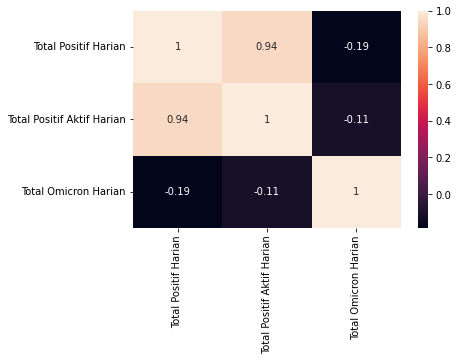

In [22]:
sns.heatmap(corr,annot=True)

### Mencari korelasi melalui diagram

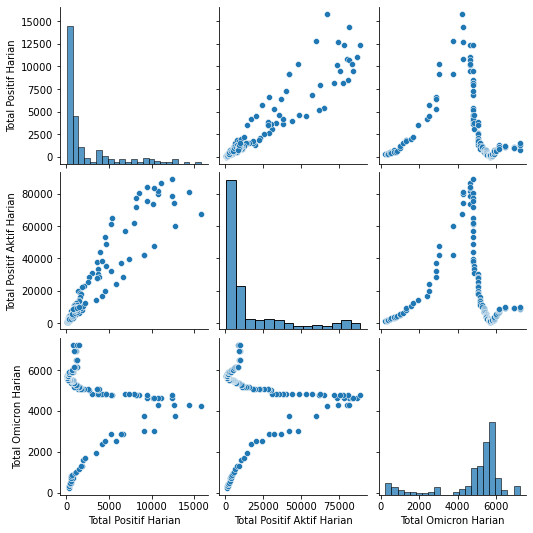

In [21]:
sns.pairplot(corrData, kind="scatter")
plt.show()

### Mencari korelasi dari variable 'Total Positif Harian' dan 'Total Positif Aktif Harian'

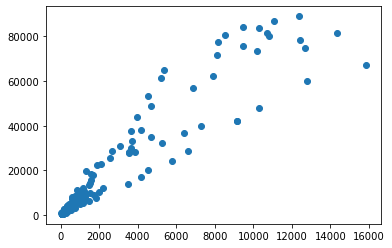

In [22]:
plt.scatter(newData['Total Positif Harian'], newData['Total Positif Aktif Harian'])
plt.show()

### Mencari value terbanyak dalam kolom Total Positif Harian

In [23]:
positif_harian_max=newData['Total Positif Harian'].max()
positif_harian_max

15825.0

### Mencari baris berdasarkan value kolom Total Positif Harian terbanyak

In [24]:
row_positif_harian_max=newData[newData['Total Positif Harian']==positif_harian_max]
row_positif_harian_max

,index,Tanggal,Total Positif Harian,PPLN,NON-PPLN,Persentase PPLN,Persentase NON-PPLN,Total Positif Aktif Harian,PPLN,NON-PPLN,Persentase PPLN,Persentase NON-PPLN,Total Omicron Harian,PPLN,NON-PPLN,Persentase PPLN,Persentase NON-PPLN
31,32,2022-02-06,15825.0,294.0,15531.0,0.018578,0.981422,67219.0,2931.0,64288.0,0.043604,0.956396,4246.0,1774.0,2472.0,0.417805,0.582195


### Mencari value terbanyak dalam kolom Total Positif Aktif Harian

In [25]:
positif_aktif_harian_max=newData['Total Positif Aktif Harian'].max()
positif_aktif_harian_max

88949.0

### Mencari baris berdasarkan value kolom Total Positif Aktif Harian terbanyak

In [26]:
row_positif_aktif_harian_max=newData[newData['Total Positif Aktif Harian']==positif_aktif_harian_max]
row_positif_aktif_harian_max

,index,Tanggal,Total Positif Harian,PPLN,NON-PPLN,Persentase PPLN,Persentase NON-PPLN,Total Positif Aktif Harian,PPLN,NON-PPLN,Persentase PPLN,Persentase NON-PPLN,Total Omicron Harian,PPLN,NON-PPLN,Persentase PPLN,Persentase NON-PPLN
41,42,2022-02-16,12388.0,719.0,11669.0,0.05804,0.94196,88949.0,3601.0,85348.0,0.040484,0.959516,4799.0,1774.0,3025.0,0.36966,0.63034


# Data Modelling
## Using Linear Regression Model

### Mendefinisikan x dan y

In [41]:
x=corrData.drop(['Total Positif Aktif Harian','Total Omicron Harian'],axis=1).values
y=corrData['Total Positif Aktif Harian'].values

### Import library dan membuat variables

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Import library

In [43]:
from sklearn.linear_model import LinearRegression

### Assign function LinearRegression dari module sklearn ke variable mesin

In [44]:
mesin=LinearRegression()

### Melatih variable mesin

In [45]:
mesin.fit(x_train,y_train)

LinearRegression()

### Membuat prediksi

In [46]:
y_pred=mesin.predict(x_test)
print(y_pred)

[ 4263.65962948 14689.84082436 71375.37555241  4276.50766545
 11625.58424398  8657.68793342  4957.4535722   2837.52763609
 24814.09317379  7424.27647968  5336.47063351  2612.6870065
  8201.58265625  2336.45423301  6608.42619518  3139.45648154
  2285.0620891   3267.9368413   5702.63965884  4025.97096391
 11625.58424398 28841.9524524  81653.80433356  2734.74334828
  4199.41944959 13925.38268376  6724.05851896  6621.27423115
 54152.58332599  5535.61519114  3165.15255349 24666.34076006
 42942.67193655 19186.65341611  8599.87177152  5207.99027374
  5445.67893931]


## Prediction Accuracy

### Check akurasi

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9499322703883598

### Pembuatan plot 

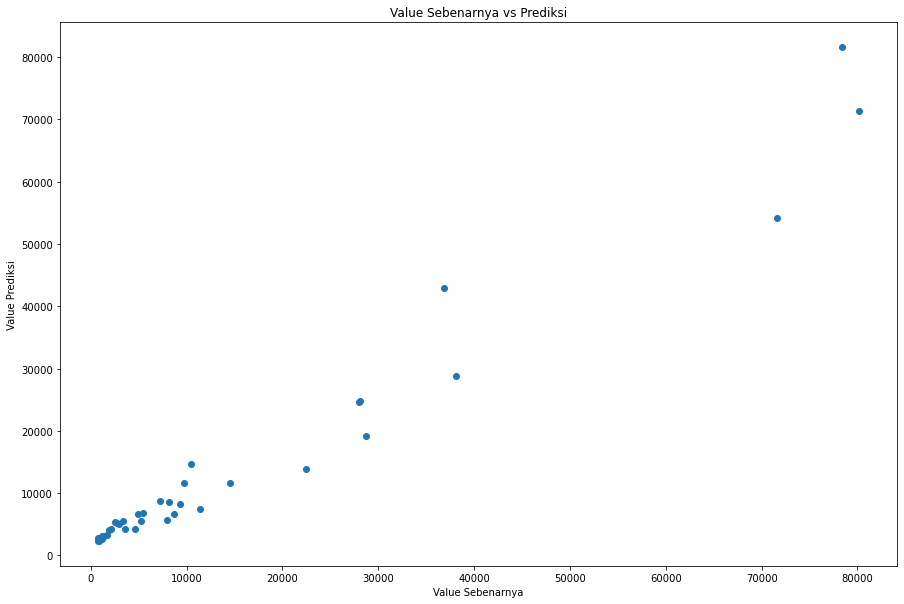

In [54]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Value Sebenarnya')
plt.ylabel('Value Prediksi')
plt.title('Value Sebenarnya vs Prediksi')
plt.show()

### Pembuatan DataFrame berdasarkan data prediksi dan data sebenarnya

In [53]:
pred_y_data=pd.DataFrame({'Value Sebenarnya':y_test,'Value Prediksi':y_pred,'Perbedaan':y_test-y_pred})
pred_y_data

,Value Sebenarnya,Value Prediksi,Perbedaan
0,4642.0,4263.659629,378.340371
1,10477.0,14689.840824,-4212.840824
2,80162.0,71375.375552,8786.624448
3,3582.0,4276.507665,-694.507665
4,9720.0,11625.584244,-1905.584244
5,7228.0,8657.687933,-1429.687933
6,2947.0,4957.453572,-2010.453572
7,775.0,2837.527636,-2062.527636
8,28065.0,24814.093174,3250.906826
9,11364.0,7424.276480,3939.723520


# Conclusion

    Dari prediksi tersebut  kita dapat melihat bahwa kemungkinan peningkatan kasus positif Covid-19 dalam beberapa waktu ke depan itu tidak kecil, jika kegiatan masyarakat dan protokol kesehatan tidak diperketat kembali maka kemungkinan terjadinya gelombang varian baru yang dapat menghambat atau bahkan melumpuhkan Covid-19 recovery di Indonesia akan semakin besar. Solusi yang dapat dilakukan pemerintah untuk mencegah gelombang baru ialah memperketat PPKM kembali, batasi kegiatan masyarakat ke area publik seperti mall, bioskop, rumah makan, kebun binatang, bar, dan klub malam. Perketat protokol kesehatan, cek suhu, cek sertifikat vaksin, dan cek surat kesehatan terutama kepada para Pelaku Perjalanan Luar Negeri (PPLN).  Jangan terapkan online untuk pendidikan, dikarenakan tidak efektif. Lebih baik lakukan pembatasan siswa seperti pembagian jadwal masuk, misalkan absen 1-20 masuk jam 07.00 lalu 21-40 masuk jam 10.00. Dikarenakan kualitas SDM yang baik sangat diperlukan terutama di masa setelah Covid-19 Recovery, dan persiapan untuk tahun 2045.

# Daftar Pustaka
    https://corona.jakarta.go.id/id
    https://tiny.cc/Datacovidjakarta
    https://nasional.sindonews.com/read/821131/15/positif-covid-19-di-indonesia-hari-ini-bertambah-2472-kasus-1657271244